In [25]:
import pandas as pd
from common import plot_nodes_error_k

# ZINC

In [28]:
zinc_measures = pd.read_parquet("results/zinc_LPCA_measures.parquet")

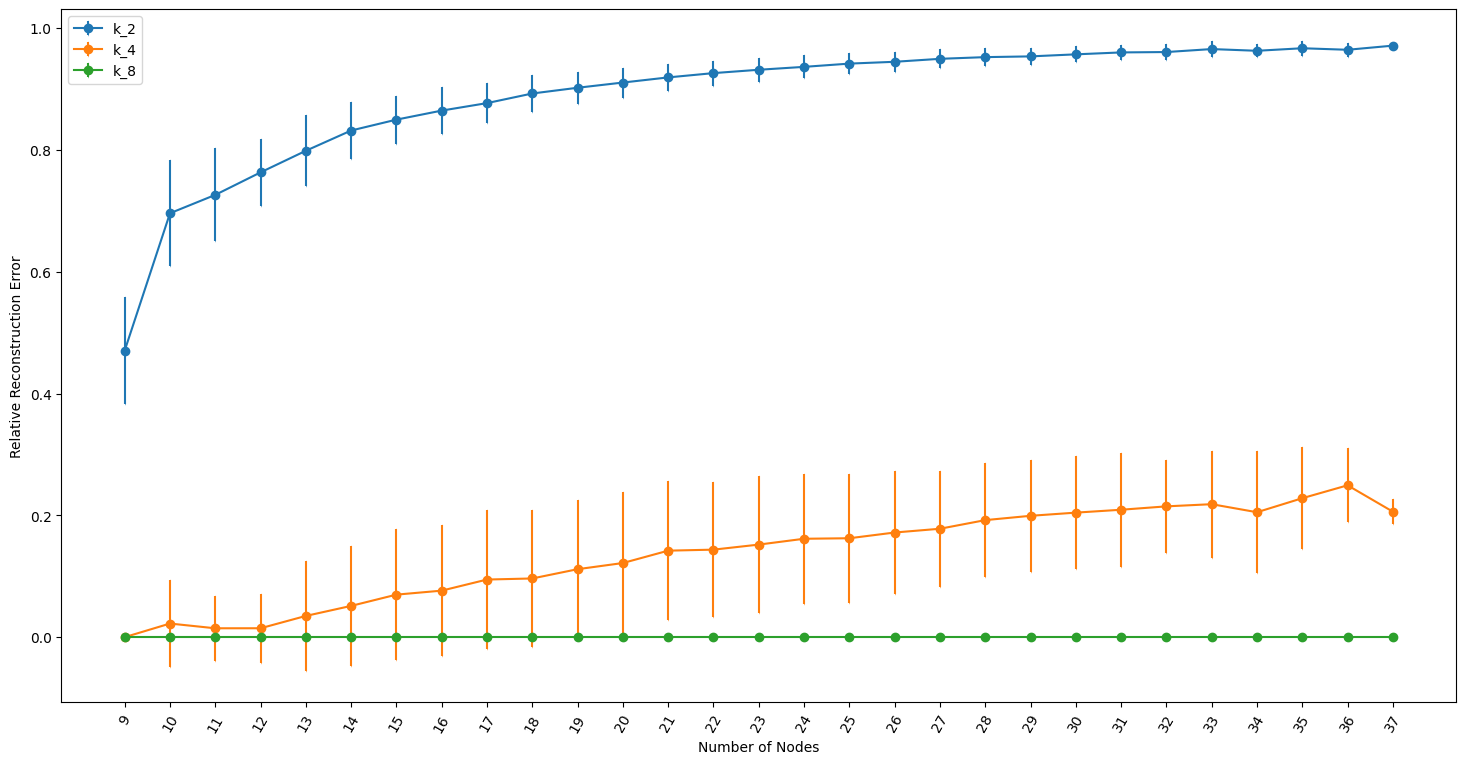

In [29]:
plot_nodes_error_k(zinc_measures, [2, 4, 8])

## fixed

In [35]:
zinc_fixed_measures = pd.read_parquet("results/zinc_LPCA_fixed_measures.parquet")

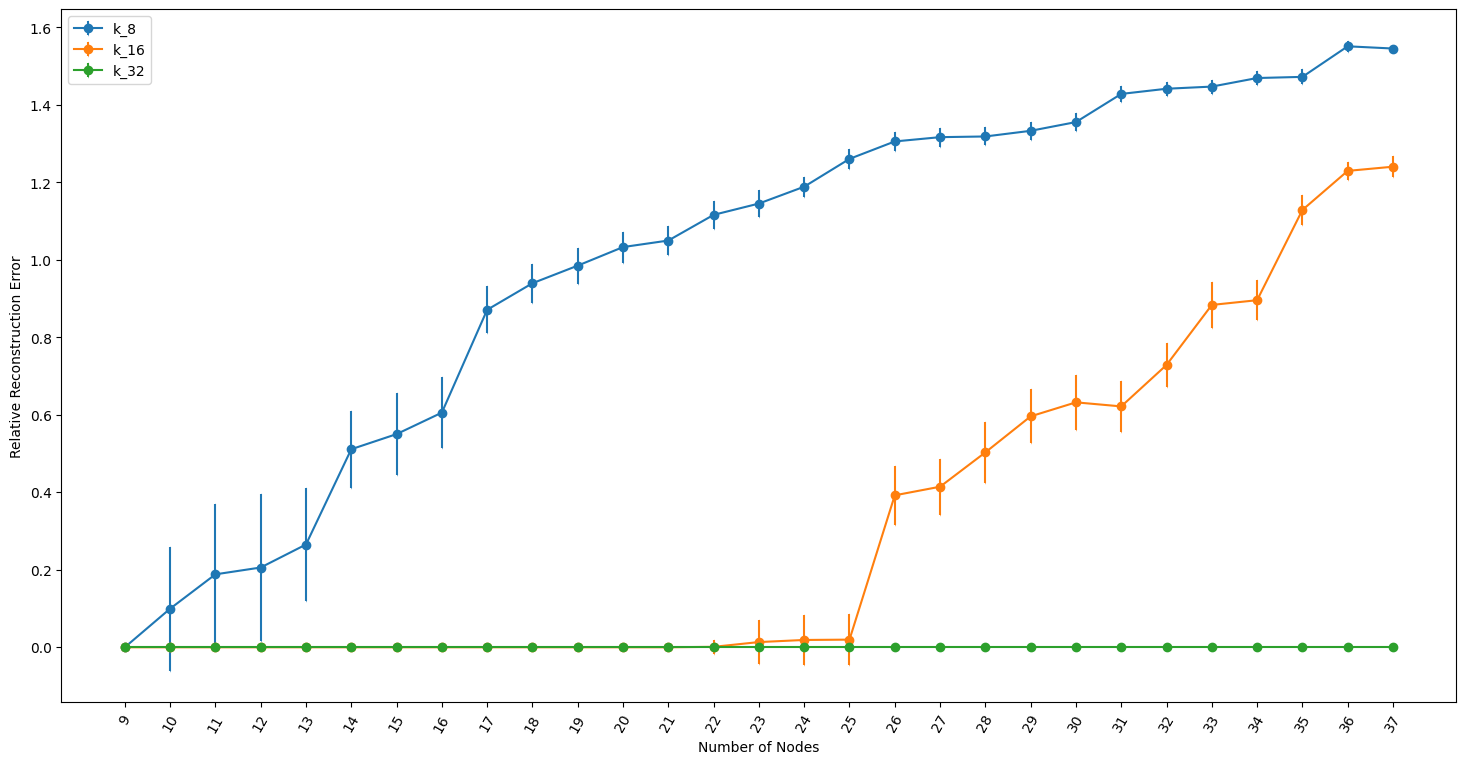

In [36]:
plot_nodes_error_k(zinc_fixed_measures, [8, 16, 32])

# Peptides

In [66]:
pep_8 = pd.read_parquet('results/peptides_LPCA_k_8.parquet')
pep_16 = pd.read_parquet('results/peptides_LPCA_k_16.parquet')
pep_32 = pd.read_parquet('results/peptides_LPCA_k_32.parquet')

In [55]:
(pep_8["error"].isna()).any()

np.False_

In [79]:
tmp = pep_8.join(pep_16, on="graph_id", rsuffix="_16").join(pep_32, on="graph_id", rsuffix="_32", lsuffix="_8").rename({"error_8": "k_8", "error_16": "k_16", "error_32": "k_32", "n_nodes_32": "n_nodes"}, axis=1)[["n_nodes", "k_8", "k_16", "k_32"]]

In [80]:
pep_measures = tmp.groupby("n_nodes").agg(["mean", "std"]).fillna(0)

In [41]:
peptides_measures = pd.read_parquet('results/peptides_LPCA_meaaures.parquet')

In [44]:
peptides_measures

k_8      k_16      k_32     
        mean  std mean  std mean  std
n_nodes                              
8        0.0  NaN  0.0  NaN  0.0  NaN
9        0.0  0.0  0.0  0.0  0.0  0.0
10       0.0  0.0  0.0  0.0  0.0  0.0
11       0.0  0.0  0.0  0.0  0.0  0.0
12       0.0  0.0  0.0  0.0  0.0  0.0
...      ...  ...  ...  ...  ...  ...
426      0.0  NaN  0.0  NaN  0.0  NaN
429      0.0  NaN  0.0  NaN  0.0  NaN
430      0.0  NaN  0.0  NaN  0.0  NaN
434      0.0  NaN  0.0  NaN  0.0  NaN
444      0.0  NaN  0.0  NaN  0.0  NaN

[413 rows x 6 columns]

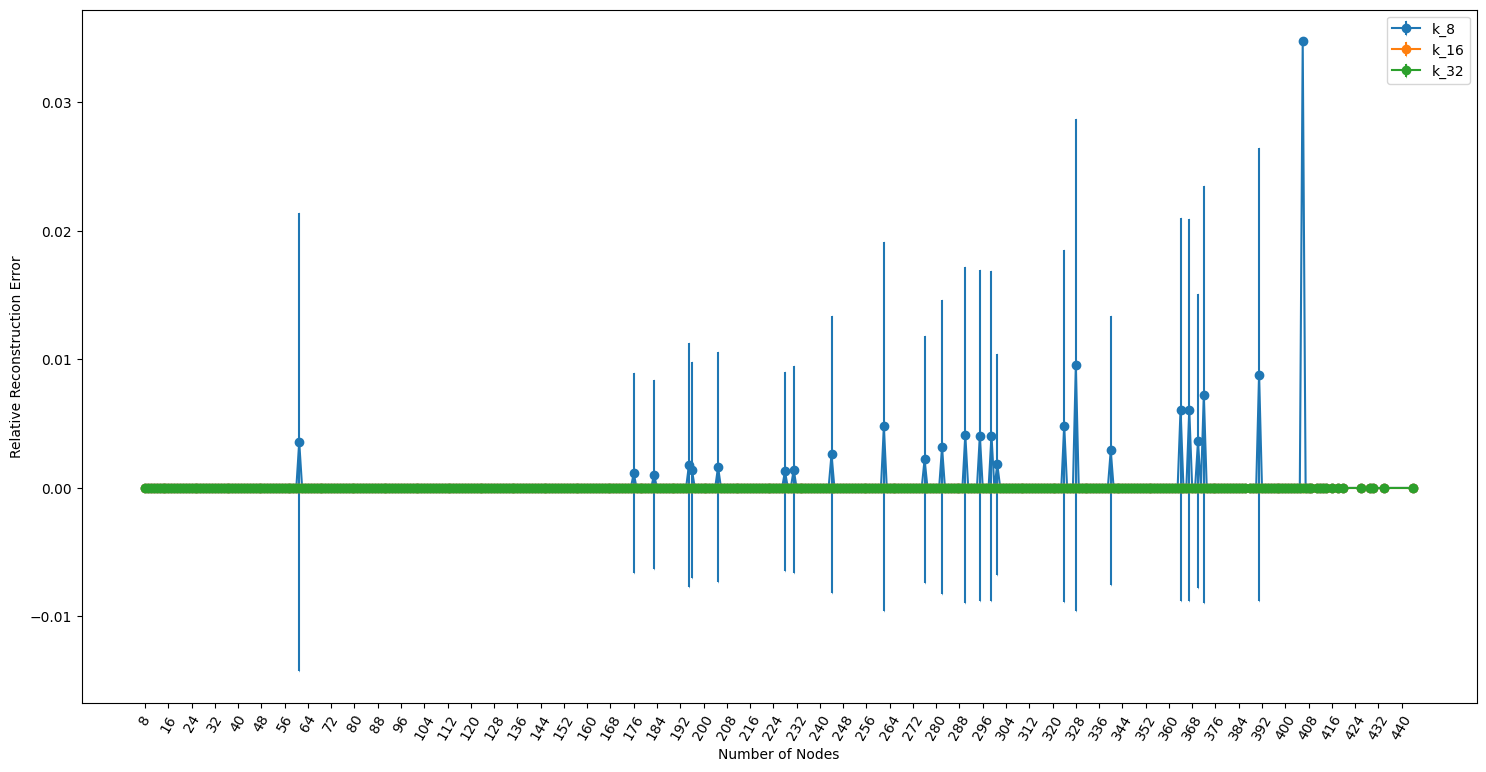

In [81]:
plot_nodes_error_k(pep_measures, [8, 16, 32])

In [83]:
pep_8[pep_8["error"] > 0]

,graph_id,n_nodes,nit,error,time
705,705,290,1018,0.041239,36.412321
725,725,276,1159,0.042033,44.416917
2256,2256,196,791,0.049752,8.161733
3989,3989,299,1309,0.040622,48.255427
4539,4539,231,1069,0.045644,14.849480
4688,4688,391,1554,0.035267,144.822860
4797,4797,406,1260,0.034752,147.922630
5471,5471,324,1134,0.038749,67.743167
5731,5731,205,714,0.048795,10.530931
6300,6300,244,880,0.044455,13.380971


# CIFAR10